In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

# Load Map Data

In [6]:
chicago = gpd.read_file('cleaned_data/chicago.geojson')
chicago = chicago[['community','geometry']]
chicago.columns=['neighborhood_id','geometry']
chicago.head()

,neighborhood_id,geometry
0,DOUGLAS,(POLYGON ((-87.60914087617894 41.8446925026539...
1,OAKLAND,(POLYGON ((-87.59215283879394 41.8169293462668...
2,FULLER PARK,(POLYGON ((-87.62879823733725 41.8018930336891...
3,GRAND BOULEVARD,(POLYGON ((-87.6067081256125 41.81681377057218...
4,KENWOOD,(POLYGON ((-87.59215283879394 41.8169293462668...


# Load Feature Data & Normalize to Run Clustering

- merged[0:2] are neighborhood IDs/names
- merged[2:111] are quantitative features
- merged[111:400] are airbnb features
- merged[400:] are foursquare features

In [59]:
df = pd.read_csv('cleaned_data/merged.csv')
df = df.fillna(0)
df = df.drop('area_num_1',axis=1)

In [54]:
print(df.shape)
df.head()

(77, 721)


,neighborhood_id,shape_area,shape_len,2000_POP,2010_POP,TOT_POP,UND19,A20_34,A35_49,A50_64,...,Volleyball Court,Warehouse,Warehouse Store,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,DOUGLAS,46004621.16,31027.05451,26470,18238,20781,0.212309,0.310813,0.172465,0.160002,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.020833,0.0,0.00
1,OAKLAND,16913961.04,19565.50615,6110,5918,6645,0.333333,0.184349,0.233860,0.149737,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.010000,0.0,0.00
2,FULLER PARK,19916704.87,25339.08975,3420,2876,2439,0.161132,0.193522,0.148421,0.236162,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.020000,0.0,0.00
3,GRAND BOULEVARD,48492503.16,28196.83716,28006,21929,22313,0.264823,0.193251,0.216959,0.178775,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.010000,0.0,0.00
4,KENWOOD,29071741.93,23325.16791,18363,17841,17189,0.184420,0.275816,0.184886,0.177614,...,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.000000,0.0,0.02


In [55]:
counts = df[df > 1].count()
counts[counts > 0]

neighborhood_id                         77
shape_area                              77
shape_len                               77
2000_POP                                77
2010_POP                                77
TOT_POP                                 77
A65_74                                  77
A75_84                                  76
OV85                                    56
POP_16OV                                77
POP_25OV                                77
MEDINC                                  77
TOT_HH                                  77
OWN_OCC_HU                              77
RENT_OCC_HU                             77
VAC_HU                                  77
HU_TOT                                  77
HV_LT_150K                              77
HV_150_300K                             77
HV_300_500K                             76
HV_GT_500K                              75
MED_HV                                  77
AVG_VMT                                 77
OPEN_SPACE_

In [56]:
venues = pd.DataFrame(normalize(df.iloc[:,400:],axis=1),columns=df.columns[400:])
df.update(venues)
df.iloc[:,400:].head()

,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,American Restaurant,Amphitheater,...,Volleyball Court,Warehouse,Warehouse Store,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0.0,0.0,0.0,0.061780,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.123560,0.0,0.000000
1,0.0,0.0,0.0,0.122169,0.0,0.0,0.0,0.0,0.122169,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.061085,0.0,0.000000
2,0.0,0.0,0.0,0.056980,0.0,0.0,0.0,0.0,0.113961,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.113961,0.0,0.000000
3,0.0,0.0,0.0,0.119952,0.0,0.0,0.0,0.0,0.119952,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.059976,0.0,0.000000
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.058124,0.0,...,0.0,0.0,0.0,0.058124,0.0,0.0,0.0,0.000000,0.0,0.116248


In [57]:
df[unstandardized].isna().any()

num_listings                             True
price_norm                               True
shape_area                              False
shape_len                               False
2000_POP                                False
2010_POP                                False
TOT_POP                                 False
POP_16OV                                False
POP_25OV                                False
MEDINC                                  False
TOT_HH                                  False
OWN_OCC_HU                              False
RENT_OCC_HU                             False
VAC_HU                                  False
HU_TOT                                  False
HV_LT_150K                              False
HV_150_300K                             False
HV_300_500K                             False
HV_GT_500K                              False
MED_HV                                  False
AVG_VMT                                 False
OPEN_SPACE_PER_1000               

In [60]:
unstandardized = ['num_listings', 'price_norm','shape_area', 'shape_len', 
                  '2000_POP', '2010_POP', 'TOT_POP','POP_16OV','POP_25OV','MEDINC',
                  'TOT_HH','OWN_OCC_HU','RENT_OCC_HU','VAC_HU','HU_TOT','HV_LT_150K',
                  'HV_150_300K','HV_300_500K','HV_GT_500K','MED_HV','AVG_VMT','OPEN_SPACE_PER_1000',
                  'POP_OV5','Birth Rate','General Fertility Rate','Teen Birth Rate',
                  'Childhood Blood Lead Level Screening','Per Capita Income']
standardized = pd.DataFrame(normalize(df[unstandardized],axis=0),columns = unstandardized)
df.update(standardized)
df.loc[:,unstandardized].head()

,num_listings,price_norm,shape_area,shape_len,2000_POP,2010_POP,TOT_POP,POP_16OV,POP_25OV,MEDINC,...,HV_GT_500K,MED_HV,AVG_VMT,OPEN_SPACE_PER_1000,POP_OV5,Birth Rate,General Fertility Rate,Teen Birth Rate,Childhood Blood Lead Level Screening,Per Capita Income
0,0.042161,0.120589,0.052503,0.072638,0.067383,0.050103,0.056304,0.059175,0.054493,0.064665,...,0.009646,0.116282,0.067241,0.237689,0.057717,0.072973,0.068649,0.067993,0.137157,0.090231
1,0.014731,0.194441,0.019303,0.045805,0.015554,0.016258,0.018004,0.016281,0.015125,0.057337,...,0.004280,0.123904,0.075697,0.224702,0.017977,0.123983,0.103949,0.108352,0.123845,0.075441
2,0.004064,0.081971,0.022730,0.059322,0.008706,0.007901,0.006608,0.006877,0.007086,0.047337,...,0.000679,0.054587,0.074153,0.090681,0.006761,0.084308,0.098255,0.137577,0.139347,0.035221
3,0.062988,0.114895,0.055342,0.066012,0.071293,0.060243,0.060454,0.058165,0.057909,0.064793,...,0.007744,0.090875,0.085224,0.111891,0.059887,0.101312,0.094677,0.108948,0.167933,0.086161
4,0.034034,0.105202,0.033178,0.054607,0.046745,0.049013,0.046572,0.047917,0.049484,0.089351,...,0.030094,0.107183,0.078457,0.190685,0.046930,0.086434,0.083127,0.051094,0.113179,0.146566


In [61]:
percents = ['A65_74','A75_84','OV85','Cancer (All Sites)','Diabetes-related','Gonorrhea in Females']
df.update(df[percents]/100)
df.loc[:,percents].head()

,A65_74,A75_84,OV85,Cancer (All Sites),Diabetes-related,Gonorrhea in Females
0,0.076512,0.042539,0.025360,0.02699,0.01191,0.10633
1,0.066968,0.023025,0.008728,0.01597,0.00887,0.16554
2,0.161132,0.062321,0.037310,0.02589,0.01117,0.10619
3,0.085466,0.045758,0.014969,0.02183,0.00826,0.14546
4,0.100704,0.053697,0.022863,0.01964,0.00455,0.06102


In [62]:
# subtract to get mean = 0 for all features
df.iloc[:,2:] = df.iloc[:,2:].subtract(df.mean(axis=0),axis=1)

# Split Qualitative & Quantitative Datasets

In [64]:
df.shape

(77, 721)

In [67]:
quant = df.iloc[:,:111]
print(quant.shape)
quant.head()

(77, 111)


,neighborhood_id,shape_area,shape_len,2000_POP,2010_POP,TOT_POP,UND19,A20_34,A35_49,A50_64,...,Gonorrhea in Females,Tuberculosis,Below Poverty Level,Crowded Housing,Dependency,No High School Diploma,Per Capita Income,Unemployment,OV65,accessible
0,DOUGLAS,0.052503,-0.031302,-0.028348,-0.046070,-0.039466,-0.038967,0.063531,-0.024270,-0.015235,...,0.030838,-0.026442,0.058078,-0.03313,-0.048299,-0.046961,-0.007847,0.033961,0.014943,-0.013085
1,OAKLAND,0.019303,-0.058135,-0.080177,-0.079915,-0.077765,0.082057,-0.062933,0.037124,-0.025500,...,0.090048,-0.001442,0.178078,-0.01413,0.046701,-0.039961,-0.022637,0.132961,-0.030747,-0.013085
2,FULLER PARK,0.022730,-0.044618,-0.087025,-0.088272,-0.089161,-0.090144,-0.053760,-0.048314,0.060925,...,0.030698,-0.068442,0.352078,-0.00413,0.023701,0.121039,-0.062858,0.266961,0.131295,-0.013085
3,GRAND BOULEVARD,0.055342,-0.037928,-0.024438,-0.035930,-0.035315,0.013547,-0.054031,0.020223,0.003538,...,0.069968,0.063558,0.080078,-0.02213,0.058701,-0.021961,-0.011918,0.072961,0.016725,0.008893
4,KENWOOD,0.033178,-0.049333,-0.048986,-0.047160,-0.049198,-0.066856,0.028534,-0.011850,0.002377,...,-0.014472,-0.068442,0.028078,-0.02613,-0.016299,-0.107961,0.048488,-0.023039,0.047796,-0.013085


In [68]:
qual = pd.concat([df.iloc[:,:2],df.iloc[:,111:]],axis=1)
print(qual.shape)
qual.head()

(77, 612)


,neighborhood_id,shape_area,activities,african,airport,amazing,american,aquarium,architecture,art,...,Volleyball Court,Warehouse,Warehouse Store,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,DOUGLAS,0.052503,-0.009627,0.070991,-0.055521,-0.030553,0.029548,0.057499,0.004552,0.000468,...,-0.00013,-0.000392,-0.001169,-0.00026,-0.00039,-0.000843,-0.000649,0.011718,-0.000519,-0.00215
1,OAKLAND,0.019303,-0.009627,-0.025783,-0.071650,-0.030553,-0.051097,0.053777,0.010755,0.051336,...,-0.00013,-0.000392,-0.001169,-0.00026,-0.00039,-0.000843,-0.000649,0.000885,-0.000519,-0.00215
2,FULLER PARK,0.022730,-0.009627,-0.025783,0.428350,-0.030553,-0.051097,-0.023146,-0.027706,-0.064049,...,-0.00013,-0.000392,-0.001169,-0.00026,-0.00039,-0.000843,-0.000649,0.010885,-0.000519,-0.00215
3,GRAND BOULEVARD,0.055342,0.023340,0.073118,-0.071650,-0.008575,0.014837,0.009821,0.005261,-0.009104,...,-0.00013,-0.000392,-0.001169,-0.00026,-0.00039,-0.000843,-0.000649,0.000885,-0.000519,-0.00215
4,KENWOOD,0.033178,0.012595,0.063106,-0.027206,0.013892,0.037792,-0.023146,0.016738,0.135951,...,-0.00013,-0.000392,-0.001169,0.00974,-0.00039,-0.000843,-0.000649,-0.009115,-0.000519,0.01785


In [69]:
qual_airbnb = pd.concat([df.iloc[:,:2],df.iloc[:,111:400]],axis=1)
qual_foursquare = pd.concat([df.iloc[:,:2],df.iloc[:,400:]],axis=1)

# Try K-Means to see if there's an optimal number of clusters

## Combined Data

In [70]:
error_df = pd.DataFrame(columns=['i','inertia'])
for i in range(1,50):
    Kmean = KMeans(n_clusters=i)
    Kmean.fit(df.iloc[:,2:].values)
    print(i, Kmean.inertia_)
    error_df = error_df.append({'i':i,'inertia':Kmean.inertia_},ignore_index=True)

1 228.77051078411694
2 183.98762721292604
3 162.57323732070998
4 146.38320193301297
5 143.13745183499003
6 130.4184937138118
7 131.58189737659785
8 122.10693465473948
9 119.55230661075971
10 113.48355072055466
11 110.23009009554004
12 104.88321368171646
13 99.91961811056728
14 97.32750326105214
15 95.29393448251163
16 90.45766622770314
17 86.05012208476458
18 85.10185480412252
19 82.00893901412786
20 78.67232670842088
21 74.77018954631642
22 71.66147034391359
23 69.85168970310676
24 67.30761833993381
25 64.1202876153293
26 61.941569863458085
27 60.35197247655786
28 58.87069074526532
29 53.64463532537963
30 53.99069973587224
31 50.890946620402744
32 51.00135103793492
33 49.19395750810568
34 46.04192992591065
35 43.51429493005589
36 42.45922958271782
37 41.36385970612685
38 39.045781785884465
39 37.372196916057085
40 36.0016766251262
41 33.86528555612732
42 32.6709665498527
43 30.57512322564191
44 30.62830173268629
45 28.54901058544682
46 27.024283654205718
47 24.800545626892074
48 23.58

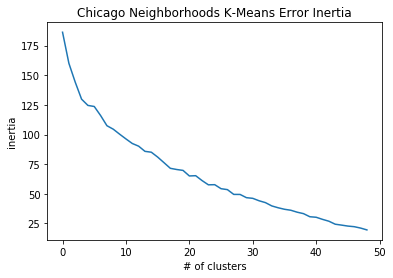

In [77]:
error_df['inertia'].plot()
plt.title('Chicago Neighborhoods K-Means Error Inertia')
plt.xlabel('# of clusters')
plt.ylabel('inertia')
plt.savefig('images/kmean_error.png')

## Quantitative Data

In [72]:
error_df = pd.DataFrame(columns=['i','inertia'])
for i in range(1,50):
    Kmean = KMeans(n_clusters=i)
    Kmean.fit(df.iloc[:,2:56].values)
    print(i, Kmean.inertia_)
    error_df = error_df.append({'i':i,'inertia':Kmean.inertia_},ignore_index=True)

1 42.472907878738795
2 23.403690002430885
3 15.356951277941203
4 13.018632342607903
5 11.833521340002351
6 10.803507698842907
7 9.79978638608469
8 9.07846329173378
9 8.90224581818822
10 7.998026382315339
11 7.292943184178727
12 7.1416451559255805
13 6.677451088010704
14 6.406543578444133
15 6.072918624115106
16 5.888342857611409
17 5.599581749866705
18 5.294386265439916
19 4.994015846166468
20 4.644668226951609
21 4.434703191589849
22 4.376611515193796
23 4.167134106854863
24 3.90148444319007
25 3.6881812980566533
26 3.546012453170226
27 3.446510769017143
28 3.273087258937337
29 3.0957944797033354
30 3.0204155427209343
31 2.843152749491257
32 2.7051309672716695
33 2.489242341220627
34 2.3120265231477557
35 2.3531954631489893
36 2.171659168737918
37 2.0828764119446994
38 2.044814291077121
39 1.863685507033027
40 1.7790367258872881
41 1.6967869643120252
42 1.6281771155428832
43 1.5914004754807083
44 1.4843804205269124
45 1.4001621049814055
46 1.300230430143742
47 1.209359597557822
48 1.1

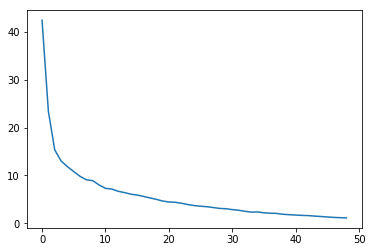

In [73]:
error_df['inertia'].plot()

## Qualitative Data

In [74]:
error_df = pd.DataFrame(columns=['i','inertia'])
for i in range(1,50):
    Kmean = KMeans(n_clusters=i)
    Kmean.fit(df.iloc[:,56:].values)
    print(i, Kmean.inertia_)
    error_df = error_df.append({'i':i,'inertia':Kmean.inertia_},ignore_index=True)

1 186.29760290537823
2 160.10541986973539
3 144.19543257677287
4 129.86211163413662
5 124.57697379650426
6 123.67605955381721
7 116.05545527306722
8 107.4650007535028
9 104.51395066454214
10 100.32524890892807
11 96.3085037359923
12 92.45909717717078
13 90.20071533115149
14 85.83286183801006
15 85.10775422636661
16 81.00886146347241
17 76.27770844766803
18 71.52467051319074
19 70.5209347646928
20 69.76695213879773
21 65.07497274611683
22 65.29396293362484
23 61.18783269718629
24 57.60391552551745
25 57.71675285280385
26 54.32742590516765
27 53.549179857517
28 49.51809362450801
29 49.48005059457257
30 46.7649687510095
31 46.196472654158974
32 44.13881554524199
33 42.58095990102498
34 39.80064548970542
35 38.249976583940125
36 36.9753205218656
37 36.156395270689856
38 34.51299602871955
39 33.29377093698519
40 30.675088099662368
41 30.238114025179065
42 28.46435961722542
43 26.90713157120585
44 24.37981404164182
45 23.61702118871722
46 22.80165189028478
47 22.285938202640644
48 21.1236220

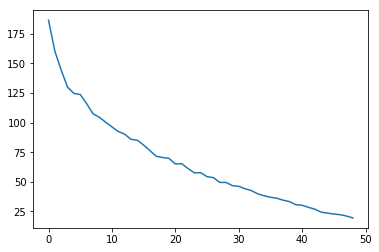

In [75]:
error_df['inertia'].plot()

Let's try 8 clusters for now

In [76]:
n_clusters = 8

# Run PCA

In [78]:
pc_cols = ['pc1','pc2','pc3'] # get top 3 principal components

## Combined Dataset

In [79]:
df.columns

Index(['neighborhood_id', 'shape_area', 'shape_len', '2000_POP', '2010_POP',
       'TOT_POP', 'UND19', 'A20_34', 'A35_49', 'A50_64',
       ...
       'Volleyball Court', 'Warehouse', 'Warehouse Store', 'Waterfront',
       'Whisky Bar', 'Wine Bar', 'Wine Shop', 'Wings Joint', 'Women's Store',
       'Yoga Studio'],
      dtype='object', length=721)

In [80]:
pca = PCA(n_components=3)
features = df.iloc[:,2:].values
principalComponents = pca.fit_transform(features)
pca_by_neighborhood = pd.DataFrame(data = principalComponents, columns = pc_cols)
pca.explained_variance_ratio_

array([0.22115395, 0.12778874, 0.07388365])

In [81]:
pcaFeaturesDf = pd.DataFrame(data = pca.components_.T, columns = pc_cols)
pcaFeaturesDf = pd.concat([pcaFeaturesDf,pd.Series(df.columns[2:])],axis=1)

In [82]:
pcaFeaturesDf.sort_values(by='pc1',ascending=False)[['pc1',0]].head()

,pc1,0
14,0.469457,BLACK
63,0.259007,ONLY_ENGLISH
66,0.259007,ENGLISH
95,0.202701,Prostate Cancer in Males
87,0.170011,Assault (Homicide)


In [83]:
pcaFeaturesDf.sort_values(by='pc1')[['pc1',0]].head()

,pc1,0
64,-0.261030,NOT_ENGLISH
13,-0.240411,HISP
319,-0.203779,restaurants
67,-0.190572,SPANISH
12,-0.184524,WHITE


In [84]:
pcaFeaturesDf.sort_values(by='pc2',ascending=False)[['pc2',0]].head()

,pc2,0
78,0.309898,assoc_plus_pct
12,0.306392,WHITE
66,0.198622,ENGLISH
63,0.198622,ONLY_ENGLISH
29,0.164387,BACH


In [85]:
pcaFeaturesDf.sort_values(by='pc2')[['pc2',0]].head()

,pc2,0
13,-0.280847,HISP
67,-0.237643,SPANISH
64,-0.190101,NOT_ENGLISH
104,-0.168070,No High School Diploma
25,-0.142679,LT_HS


## Quantitative Only

In [86]:
quant.columns

Index(['neighborhood_id', 'shape_area', 'shape_len', '2000_POP', '2010_POP',
       'TOT_POP', 'UND19', 'A20_34', 'A35_49', 'A50_64',
       ...
       'Gonorrhea in Females', 'Tuberculosis', 'Below Poverty Level',
       'Crowded Housing', 'Dependency', 'No High School Diploma',
       'Per Capita Income', 'Unemployment', 'OV65', 'accessible'],
      dtype='object', length=111)

In [87]:
quant_features = quant.iloc[:,2:].values
quant_features

array([[-0.03130204, -0.02834828, -0.04606977, ...,  0.03396104,
         0.0149427 , -0.0130846 ],
       [-0.05813488, -0.0801772 , -0.07991519, ...,  0.13296104,
        -0.03074722, -0.0130846 ],
       [-0.04461824, -0.08702494, -0.08827214, ...,  0.26696104,
         0.13129454, -0.0130846 ],
       ...,
       [ 0.30253889, -0.06603626, -0.06112988, ..., -0.08603896,
         0.02178022, -0.0130846 ],
       [-0.03135407,  0.06260181,  0.05910099, ..., -0.04303896,
         0.01667685,  0.01453971],
       [-0.04321793, -0.06689413, -0.06544023, ..., -0.05903896,
         0.02546515, -0.0130846 ]])

In [88]:
quant_pca = PCA(n_components=3)
quantPrincipalComponents = quant_pca.fit_transform(quant_features)
quant_pca_by_neighborhood = pd.DataFrame(data = quantPrincipalComponents, columns = pc_cols)
quant_pca.explained_variance_ratio_

array([0.46245294, 0.24768098, 0.07028944])

In [89]:
quantPcaFeaturesDf = pd.DataFrame(data = quant_pca.components_.T, columns = pc_cols)
quantPcaFeaturesDf = pd.concat([quantPcaFeaturesDf,pd.Series(quant.columns[2:])],axis=1)
quantPcaFeaturesDf.head()

,pc1,pc2,pc3,0
0,-0.007404,0.010188,0.072032,shape_len
1,-0.018069,0.016240,-0.110947,2000_POP
2,-0.025036,0.024091,-0.105726,2010_POP
3,-0.027298,0.031070,-0.103450,TOT_POP
4,0.011485,-0.084705,0.013336,UND19


In [90]:
quantPcaFeaturesDf.sort_values(by='pc1',ascending=False)[['pc1',0]].head()

,pc1,0
14,0.500742,BLACK
66,0.289463,ENGLISH
63,0.289463,ONLY_ENGLISH
95,0.216633,Prostate Cancer in Males
87,0.180340,Assault (Homicide)


In [91]:
quantPcaFeaturesDf.sort_values(by='pc1')[['pc1',0]].head()

,pc1,0
64,-0.291506,NOT_ENGLISH
13,-0.268910,HISP
67,-0.214006,SPANISH
12,-0.183346,WHITE
61,-0.168897,FOR_BORN


In [92]:
quantPcaFeaturesDf.sort_values(by='pc2',ascending=False)[['pc2',0]].head()

,pc2,0
12,0.379108,WHITE
78,0.347943,assoc_plus_pct
63,0.204130,ONLY_ENGLISH
66,0.204130,ENGLISH
29,0.186403,BACH


In [93]:
quantPcaFeaturesDf.sort_values(by='pc2')[['pc2',0]].head()

,pc2,0
13,-0.302356,HISP
67,-0.260746,SPANISH
104,-0.195846,No High School Diploma
64,-0.194055,NOT_ENGLISH
25,-0.166164,LT_HS


## Qualitative Features Only

In [94]:
qual.columns[2:]

Index(['activities', 'african', 'airport', 'amazing', 'american', 'aquarium',
       'architecture', 'art', 'artists', 'arts',
       ...
       'Volleyball Court', 'Warehouse', 'Warehouse Store', 'Waterfront',
       'Whisky Bar', 'Wine Bar', 'Wine Shop', 'Wings Joint', 'Women's Store',
       'Yoga Studio'],
      dtype='object', length=610)

In [95]:
qual_features = qual.iloc[:,2:].values
qual_features

array([[-0.00962714,  0.07099101, -0.05552092, ...,  0.01171801,
        -0.00051948, -0.00215018],
       [-0.00962714, -0.02578319, -0.07164995, ...,  0.00088468,
        -0.00051948, -0.00215018],
       [-0.00962714, -0.02578319,  0.42835005, ...,  0.01088468,
        -0.00051948, -0.00215018],
       ...,
       [-0.00962714, -0.02578319,  0.03946116, ..., -0.00911532,
        -0.00051948,  0.0127752 ],
       [-0.00410228, -0.02578319, -0.06612509, ..., -0.00911532,
        -0.00051948, -0.00215018],
       [-0.00962714, -0.02578319, -0.07164995, ..., -0.00911532,
        -0.00051948,  0.00784982]])

In [96]:
qual_pca = PCA(n_components=3)
qual_principal_components = qual_pca.fit_transform(qual_features)
qual_pca_by_neighborhood = pd.DataFrame(data = qual_principal_components, columns = pc_cols)
qual_pca.explained_variance_ratio_

array([0.12992039, 0.08600262, 0.06991303])

In [97]:
qualPcaFeaturesDf = pd.DataFrame(data = qual_pca.components_.T, columns = pc_cols)
qualPcaFeaturesDf = pd.concat([qualPcaFeaturesDf,pd.Series(qual.columns[2:])],axis=1)

In [98]:
qualPcaFeaturesDf.sort_values(by='pc1',ascending=False)[['pc1',0]].head()

,pc1,0
169,0.259658,mexican
273,0.243060,walking
193,0.239911,pizza
162,0.238196,local
194,0.237640,places


In [99]:
qualPcaFeaturesDf.sort_values(by='pc1')[['pc1',0]].head()

,pc1,0
255,-0.054915,train
210,-0.051934,restaurants
181,-0.045341,nightlife
168,-0.041367,metra
219,-0.037861,safest


In [100]:
qualPcaFeaturesDf.sort_values(by='pc2',ascending=False)[['pc2',0]].head()

,pc2,0
210,0.623341,restaurants
15,0.287537,bars
225,0.229145,shops
273,0.177926,walking
62,0.156863,coffee


In [101]:
qualPcaFeaturesDf.sort_values(by='pc2')[['pc2',0]].head()

,pc2,0
203,-0.167965,quiet
263,-0.070253,university
137,-0.056722,hospital
374,-0.043754,Discount Store
389,-0.041579,Fast Food Restaurant


## Airbnb Features

In [102]:
qual_pca_airbnb = PCA(n_components=3)
pc = qual_pca_airbnb.fit_transform(qual_airbnb.iloc[:,2:].values)
qual_pca_by_neighborhood_airbnb = pd.DataFrame(data = pc, columns = pc_cols)
qual_pca_airbnb.explained_variance_ratio_

array([0.13097342, 0.08592724, 0.0702068 ])

In [103]:
airbnb_features = pd.DataFrame(data = qual_pca_airbnb.components_.T, columns = pc_cols)
airbnb_features = pd.concat([airbnb_features,pd.Series(qual_airbnb.columns[2:])],axis=1)

In [104]:
airbnb_features.sort_values(by='pc1',ascending=False)[['pc1',0]].head()

,pc1,0
169,0.259467,mexican
273,0.242964,walking
193,0.240001,pizza
162,0.238230,local
194,0.237747,places


In [105]:
airbnb_features.sort_values(by='pc1')[['pc1',0]].head()

,pc1,0
255,-0.055012,train
210,-0.052747,restaurants
181,-0.045499,nightlife
168,-0.041344,metra
219,-0.037942,safest


In [106]:
airbnb_features.sort_values(by='pc2',ascending=False)[['pc2',0]].head()

,pc2,0
210,0.627532,restaurants
15,0.287412,bars
225,0.228799,shops
273,0.177892,walking
62,0.156474,coffee


In [107]:
airbnb_features.sort_values(by='pc2')[['pc2',0]].head()

,pc2,0
203,-0.164442,quiet
263,-0.074309,university
137,-0.057499,hospital
175,-0.033916,museum
90,-0.029915,drive


## Foursquare Features

In [108]:
qual_pca_foursquare = PCA(n_components=3)
pc = qual_pca_foursquare.fit_transform(qual_foursquare.iloc[:,2:].values)
qual_pca_by_neighborhood_foursquare = pd.DataFrame(data = pc, columns = pc_cols)
qual_pca_foursquare.explained_variance_ratio_

array([0.22756388, 0.14003815, 0.05128862])

In [111]:
foursquare_features = pd.DataFrame(data = qual_pca_foursquare.components_.T, columns = pc_cols)
foursquare_features = pd.concat([foursquare_features,pd.Series(qual_foursquare.columns[2:])],axis=1)

In [112]:
foursquare_features.sort_values(by='pc1',ascending=False)[['pc1',0]].head()

,pc1,0
100,0.448959,Fast Food Restaurant
85,0.425004,Discount Store
226,0.327639,Pharmacy
89,0.262165,Donut Shop
185,0.221816,Mexican Restaurant


In [113]:
foursquare_features.sort_values(by='pc1')[['pc1',0]].head()

,pc1,0
65,-0.323817,Coffee Shop
26,-0.173941,Bar
161,-0.093405,Italian Restaurant
134,-0.089481,Gym
53,-0.087442,Café


In [114]:
foursquare_features.sort_values(by='pc2',ascending=False)[['pc2',0]].head()

,pc2,0
185,0.803539,Mexican Restaurant
286,0.257772,Taco Place
132,0.117902,Grocery Store
149,0.112391,Hot Dog Joint
135,0.106608,Gym / Fitness Center


In [115]:
foursquare_features.sort_values(by='pc2')[['pc2',0]].head()

,pc2,0
100,-0.200581,Fast Food Restaurant
85,-0.176776,Discount Store
179,-0.170336,Lounge
217,-0.147767,Park
22,-0.097992,BBQ Joint


# K-Means Clustering of Data

## Combined Dataset

In [116]:
Kmean = KMeans(n_clusters=n_clusters)
Kmean.fit(features)
Kmean.labels_

array([4, 4, 4, 4, 4, 6, 4, 7, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       6, 2, 6, 4, 4, 4, 6, 4, 6, 1, 1, 7, 2, 2, 6, 7, 4, 4, 0, 4, 4, 1,
       6, 0, 0, 6, 4, 0, 1, 4, 4, 2, 2, 1, 1, 2, 1, 1, 1, 5, 1, 2, 4, 4,
       4, 6, 2, 4, 4, 4, 2, 4, 2, 6, 3], dtype=int32)

In [121]:
df['kmean'] = Kmean.labels_
df[['kmean','neighborhood_id']].head()

pca_by_neighborhood = pd.concat([pca_by_neighborhood, df[['kmean','neighborhood_id']]], axis = 1)
pca_by_neighborhood.head()

,pc1,pc2,pc3,kmean,neighborhood_id
0,0.680933,0.223312,0.054258,4,DOUGLAS
1,0.736660,0.250264,0.187432,4,OAKLAND
2,1.155851,-0.474945,-0.083633,4,FULLER PARK
3,0.917491,0.191294,0.065012,4,GRAND BOULEVARD
4,0.539881,0.458770,0.072033,4,KENWOOD


## Qualitative Dataset

In [122]:
Kmean = KMeans(n_clusters=n_clusters)
Kmean.fit(qual_features)
Kmean.labels_

array([2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 2, 2,
       2, 2, 2, 0, 3, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 5, 0, 0, 0, 0, 7, 1, 1, 2, 2, 1, 1, 0, 4, 1, 0, 1, 0,
       0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 6], dtype=int32)

In [124]:
qual['kmean'] = Kmean.labels_
qual[['kmean','neighborhood_id']].head()

,kmean,neighborhood_id
0,2,DOUGLAS
1,2,OAKLAND
2,0,FULLER PARK
3,0,GRAND BOULEVARD
4,0,KENWOOD


In [125]:
qual_pca_by_neighborhood = pd.concat([qual_pca_by_neighborhood, qual[['kmean','neighborhood_id']]], axis = 1)
qual_pca_by_neighborhood.head()

,pc1,pc2,pc3,kmean,neighborhood_id
0,-0.056923,-0.023566,-0.301453,2,DOUGLAS
1,0.048394,0.089232,-0.751473,2,OAKLAND
2,-0.091866,-0.397850,-0.043263,0,FULLER PARK
3,-0.071926,-0.089428,-0.320645,0,GRAND BOULEVARD
4,-0.078002,-0.186985,-0.317336,0,KENWOOD


## Quantitative Dataset

In [126]:
Kmean = KMeans(n_clusters=n_clusters)
Kmean.fit(quant_features)
Kmean.labels_

array([0, 0, 7, 0, 0, 4, 0, 4, 0, 4, 5, 1, 5, 5, 5, 5, 5, 5, 2, 5, 2, 5,
       4, 2, 4, 7, 7, 0, 4, 7, 4, 2, 2, 4, 3, 1, 4, 4, 7, 7, 7, 0, 7, 2,
       4, 7, 7, 4, 6, 6, 2, 7, 6, 5, 5, 2, 2, 5, 2, 2, 2, 5, 2, 2, 7, 7,
       7, 4, 5, 7, 1, 7, 1, 0, 5, 4, 1], dtype=int32)

In [127]:
quant['kmean'] = Kmean.labels_
quant[['kmean','neighborhood_id']].head()

,kmean,neighborhood_id
0,0,DOUGLAS
1,0,OAKLAND
2,7,FULLER PARK
3,0,GRAND BOULEVARD
4,0,KENWOOD


In [128]:
quant_pca_by_neighborhood = pd.concat([quant_pca_by_neighborhood, quant[['kmean','neighborhood_id']]], axis = 1)
quant_pca_by_neighborhood.head()

,pc1,pc2,pc3,kmean,neighborhood_id
0,0.664108,0.090407,-0.157302,0,DOUGLAS
1,0.742037,-0.017383,-0.144211,0,OAKLAND
2,1.141906,-0.420159,0.064286,7,FULLER PARK
3,0.888573,0.055612,-0.190827,0,GRAND BOULEVARD
4,0.478959,0.395264,-0.111061,0,KENWOOD


# Map colors to be similar between datasets

This is done by manually looking at the similar big areas within the NYC map

In [129]:
pca_by_neighborhood.head()

,pc1,pc2,pc3,kmean,neighborhood_id
0,0.680933,0.223312,0.054258,4,DOUGLAS
1,0.736660,0.250264,0.187432,4,OAKLAND
2,1.155851,-0.474945,-0.083633,4,FULLER PARK
3,0.917491,0.191294,0.065012,4,GRAND BOULEVARD
4,0.539881,0.458770,0.072033,4,KENWOOD


In [149]:
qual_pca_by_neighborhood.kmean = qual_pca_by_neighborhood.kmean.replace(
    {0:4,1:1,2:6,3:7,4:5,5:0,6:3,7:2})
qual_pca_by_neighborhood.head()

,pc1,pc2,pc3,kmean,neighborhood_id
0,-0.056923,-0.023566,-0.301453,6,DOUGLAS
1,0.048394,0.089232,-0.751473,6,OAKLAND
2,-0.091866,-0.397850,-0.043263,4,FULLER PARK
3,-0.071926,-0.089428,-0.320645,4,GRAND BOULEVARD
4,-0.078002,-0.186985,-0.317336,4,KENWOOD


In [152]:
quant_pca_by_neighborhood.kmean = quant_pca_by_neighborhood.kmean.replace(
    {0:7,1:3,2:1,3:5,4:6,5:2,6:0,7:4})
quant_pca_by_neighborhood.head()

,pc1,pc2,pc3,kmean,neighborhood_id
0,0.664108,0.090407,-0.157302,7,DOUGLAS
1,0.742037,-0.017383,-0.144211,7,OAKLAND
2,1.141906,-0.420159,0.064286,4,FULLER PARK
3,0.888573,0.055612,-0.190827,7,GRAND BOULEVARD
4,0.478959,0.395264,-0.111061,7,KENWOOD


# PCA Plots of Data

In [142]:
#get color map 
cmap = ListedColormap(sns.color_palette("Paired",n_clusters))

## Combined

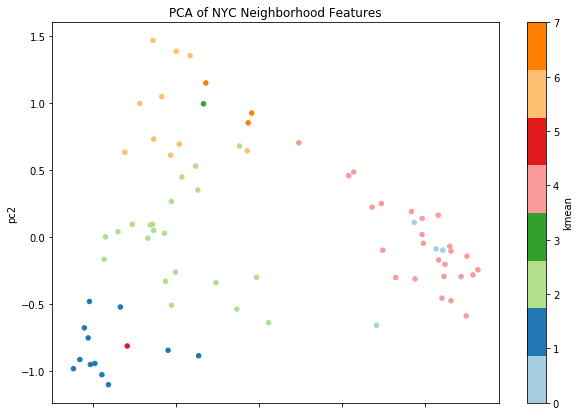

In [143]:
pca_by_neighborhood.plot.scatter(x='pc1',y='pc2',c='kmean',
                                 colormap = cmap, figsize=(10,7))
plt.title('PCA of NYC Neighborhood Features')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.savefig('images/pca_all.png')

## Qualitative

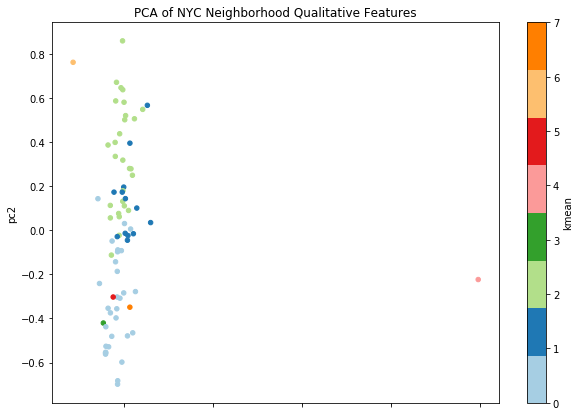

In [144]:
qual_pca_by_neighborhood.plot.scatter(x='pc1',y='pc2',c='kmean',
                                      colormap = cmap, figsize=(10,7))
plt.title('PCA of NYC Neighborhood Qualitative Features')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.savefig('images/pca_qual.png')

## Quantitative

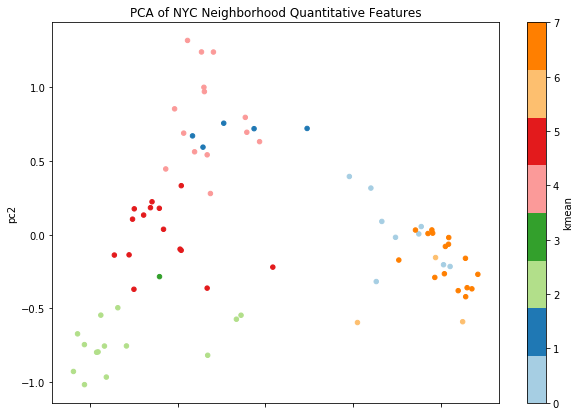

In [145]:
quant_pca_by_neighborhood.plot.scatter(x='pc1',y='pc2',c='kmean',
                                       colormap = cmap,figsize=(10,7))
plt.title('PCA of NYC Neighborhood Quantitative Features')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.savefig('images/pca_quant.png')

# Maps Plotting Clustered Neighborhoods

In [136]:
chicago_all = chicago.merge(pca_by_neighborhood,on='neighborhood_id')
chicago_all.head()

,neighborhood_id,geometry,pc1,pc2,pc3,kmean
0,DOUGLAS,(POLYGON ((-87.60914087617894 41.8446925026539...,0.680933,0.223312,0.054258,4
1,OAKLAND,(POLYGON ((-87.59215283879394 41.8169293462668...,0.736660,0.250264,0.187432,4
2,FULLER PARK,(POLYGON ((-87.62879823733725 41.8018930336891...,1.155851,-0.474945,-0.083633,4
3,GRAND BOULEVARD,(POLYGON ((-87.6067081256125 41.81681377057218...,0.917491,0.191294,0.065012,4
4,KENWOOD,(POLYGON ((-87.59215283879394 41.8169293462668...,0.539881,0.458770,0.072033,4


In [150]:
chicago_qual = chicago.merge(qual_pca_by_neighborhood,on='neighborhood_id')
chicago_qual.head()

,neighborhood_id,geometry,pc1,pc2,pc3,kmean
0,DOUGLAS,(POLYGON ((-87.60914087617894 41.8446925026539...,-0.056923,-0.023566,-0.301453,6
1,OAKLAND,(POLYGON ((-87.59215283879394 41.8169293462668...,0.048394,0.089232,-0.751473,6
2,FULLER PARK,(POLYGON ((-87.62879823733725 41.8018930336891...,-0.091866,-0.397850,-0.043263,4
3,GRAND BOULEVARD,(POLYGON ((-87.6067081256125 41.81681377057218...,-0.071926,-0.089428,-0.320645,4
4,KENWOOD,(POLYGON ((-87.59215283879394 41.8169293462668...,-0.078002,-0.186985,-0.317336,4


In [153]:
chicago_quant = chicago.merge(quant_pca_by_neighborhood,on='neighborhood_id')
chicago_quant.head()

,neighborhood_id,geometry,pc1,pc2,pc3,kmean
0,DOUGLAS,(POLYGON ((-87.60914087617894 41.8446925026539...,0.664108,0.090407,-0.157302,7
1,OAKLAND,(POLYGON ((-87.59215283879394 41.8169293462668...,0.742037,-0.017383,-0.144211,7
2,FULLER PARK,(POLYGON ((-87.62879823733725 41.8018930336891...,1.141906,-0.420159,0.064286,4
3,GRAND BOULEVARD,(POLYGON ((-87.6067081256125 41.81681377057218...,0.888573,0.055612,-0.190827,7
4,KENWOOD,(POLYGON ((-87.59215283879394 41.8169293462668...,0.478959,0.395264,-0.111061,7


/usr/local/lib/python3.7/site-packages/geopandas/plotting.py:459: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  FutureWarning,


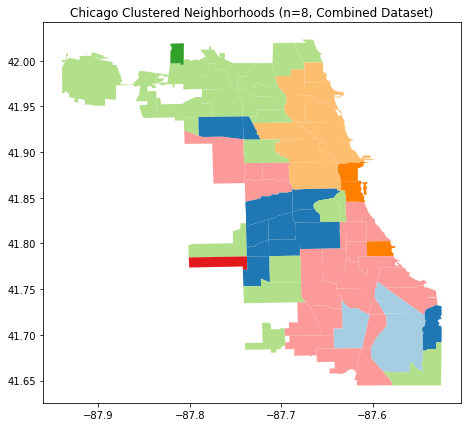

In [146]:
chicago_all.plot(column='kmean',colormap=cmap,figsize=(20,7))
plt.title('Chicago Clustered Neighborhoods (n=8, Combined Dataset)')
plt.savefig('images/map_combined.png')

/usr/local/lib/python3.7/site-packages/geopandas/plotting.py:459: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  FutureWarning,


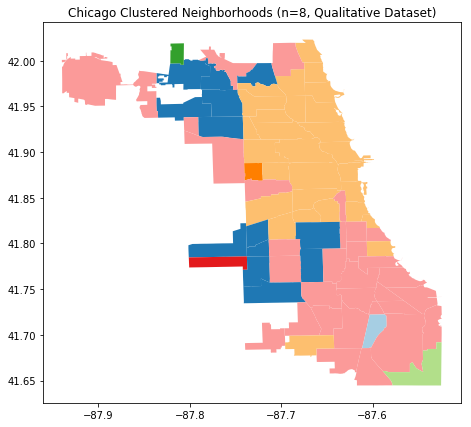

In [151]:
chicago_qual.plot(column='kmean',colormap=cmap,figsize=(20,7))
plt.title('Chicago Clustered Neighborhoods (n=8, Qualitative Dataset)')
plt.savefig('images/map_qual.png')

/usr/local/lib/python3.7/site-packages/geopandas/plotting.py:459: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  FutureWarning,


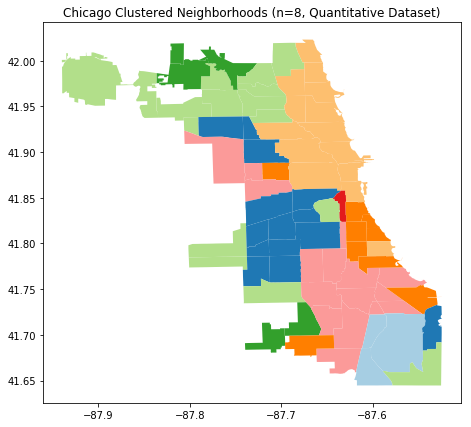

In [154]:
chicago_quant.plot(column='kmean',colormap=cmap,figsize=(20,7))
plt.title('Chicago Clustered Neighborhoods (n=8, Quantitative Dataset)')
plt.savefig('images/map_quant.png')

# Save Cluster Information to CSV

In [155]:
qual = pd.DataFrame(qual_pca_by_neighborhood[['neighborhood_id','kmean']])
qual.columns = ['neighborhood_id','kmean_qual']
quant = pd.DataFrame(quant_pca_by_neighborhood[['neighborhood_id','kmean']])
quant.columns = ['neighborhood_id','kmean_quant']

all_kmeans = pca_by_neighborhood[['neighborhood_id','kmean']].merge(qual,on='neighborhood_id')
all_kmeans = all_kmeans.merge(quant,on='neighborhood_id')
all_kmeans

,neighborhood_id,kmean,kmean_qual,kmean_quant
0,DOUGLAS,4,6,7
1,OAKLAND,4,6,7
2,FULLER PARK,4,4,4
3,GRAND BOULEVARD,4,4,7
4,KENWOOD,4,4,7
5,LINCOLN SQUARE,6,6,6
6,WASHINGTON PARK,4,4,7
7,HYDE PARK,7,6,6
8,WOODLAWN,4,4,7
9,ROGERS PARK,2,6,6


In [156]:
all_kmeans.to_csv('cleaned_data/kmeans.csv',index=False)